In [4]:
import math
import numpy as np
e=3
tn=e+1
lem=[3000,4000,2000]
xco=[0,lem[0],(lem[0]+lem[1]),(lem[0]+lem[1]+lem[2])]
yco=[0,0,0,0]

I =5e6
E =210e3

snel= [1,2,3]                                                   #start node of elements
enel= [2,3,4]                                                   #end node of elements

lenofel = []                                                    #length of element

elstmat = []                                                  #element stiffness matrix

for i in range(e):  
    a = snel[i]
    b = enel[i]
    x1 = float(xco[a-1])
    y1 = float(yco[a-1])
    x2 = float(xco[b-1])
    y2 = float(yco[b-1])
    L= math.sqrt((x2-x1)**2+(y2-y1)**2)
    mat =E*I*np.array([[12/L**3,  6/L**2,  -12/L**3,  6/L**2],
                      [6/L**2  ,     4/L,   -6/L**2,     2/L],
                      [-12/L**3, -6/L**2,   12/L**3, -6/L**2],
                      [6/L**2  ,     2/L,   -6/L**2,    4/L]])
    snel.append(a)
    enel.append(b)
    lenofel.append(L)
    elstmat.append(mat)
    
esm=[]                               #element global stiffness matrix for mapping
for i in range(e):                     
    m = snel[i]*2                     
    n = enel[i]*2                     
    assmat = [m-1, m, n-1, n]             # association matrix for element
    
    gmat = np.zeros((tn*2, tn*2))    # global stiffness matrix loaded with zeros for element(i)
    elmat = elstmat[i]                  # take element stiffness matrix of element(i)
    for j in range(4):                  
        for k in range(4):              
            a = assmat[j]-1                # row of GST matrix for element(i)
            b = assmat[k]-1                # column of GST matrix for element(i)
            gmat[a,b] = elmat[j,k]      #updating values in GST matrix with EST matrix of element(i)
    esm.append(gmat)

GSM = np.zeros((tn*2, tn*2))         #creating an empyty GSM matrix
for mat in esm:
    GSM = GSM+mat  
print("Global stiffness matrix for the structure:\n\n")    
print(GSM)     


displist = []
forcelist = []
for i in range(tn):
    a = str('v')+str(i+1)               # vertical displacement
    displist.append(a)                      
    b = str('w')+str(i+1)               # rotation at node
    displist.append(b) 
    c = str('fy')+str(i+1)              # vertical reaction 
    forcelist.append(c)
    d = str('M')+str(i+1)               # moment at node
    forcelist.append(d) 
dispmat = np.ones((tn*2,1))    

dispmat = np.ones((tn*2,1))
dispmat[1*2-2, 0] = 0
dispmat[2*2-2, 0] = 0
dispmat[3*2-2, 0] = 0
dispmat[4*2-1, 0] = 0
dispmat[4*2-2, 0] = 0

forcemat=np.zeros((tn*2,1))
elnbr=2
W=7
forcemat[(2*elnbr-1),0]=forcemat[(2*elnbr-1),0]-(W*lenofel[elnbr-1]**2)/12
forcemat[(2*elnbr-2),0]= forcemat[(2*elnbr-2),0]-(W*lenofel[elnbr-1])/2  
forcemat[(2*elnbr),0]=forcemat[(2*elnbr),0]-(W*lenofel[elnbr-1])/2 
forcemat[(2*elnbr+1),0]=forcemat[(2*elnbr+1),0]+(W*lenofel[elnbr-1]**2)/12
fcorr=-forcemat

Global stiffness matrix for the structure:


[[ 4.66666667e+02  7.00000000e+05 -4.66666667e+02  7.00000000e+05
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 7.00000000e+05  1.40000000e+09 -7.00000000e+05  7.00000000e+08
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.66666667e+02 -7.00000000e+05  6.63541667e+02 -3.06250000e+05
  -1.96875000e+02  3.93750000e+05  0.00000000e+00  0.00000000e+00]
 [ 7.00000000e+05  7.00000000e+08 -3.06250000e+05  2.45000000e+09
  -3.93750000e+05  5.25000000e+08  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.96875000e+02 -3.93750000e+05
   1.77187500e+03  1.18125000e+06 -1.57500000e+03  1.57500000e+06]
 [ 0.00000000e+00  0.00000000e+00  3.93750000e+05  5.25000000e+08
   1.18125000e+06  3.15000000e+09 -1.57500000e+06  1.05000000e+09]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.57500000e+03 -1.57500000e+06  1.57500000e+03 -1.57500000e+06]
 [ 0.00000000e+00  0.000

In [5]:
import numpy
rcdlist = []
for i in range(tn*2):
    if dispmat[i,0] == 0:
        rcdlist.append(i)
rrgsm = numpy.delete(GSM, rcdlist, 0) #row reduction
crgsm = numpy.delete(rrgsm, rcdlist, 1) #column reduction
rgsm = crgsm #reduced global stiffness matrix
rforcemat = numpy.delete(forcemat, rcdlist, 0) #reduced force mat
rdispmat = numpy.delete(dispmat, rcdlist, 0) #reduced disp mat



dispresult = numpy.matmul(numpy.linalg.inv(rgsm), rforcemat)
temp = 0
for i in range(tn*2):
    if dispmat[i,0] == 1:
        dispmat[i,0] = dispresult[temp,0]
        temp+=1
print(dispmat)
forceresult = numpy.matmul(GSM, dispmat)
forceresult=forceresult+fcorr
print(forceresult)

[[ 0.        ]
 [ 0.00270531]
 [ 0.        ]
 [-0.00541063]
 [ 0.        ]
 [ 0.00386473]
 [ 0.        ]
 [ 0.        ]]
[[-1.89371981e+03]
 [ 0.00000000e+00]
 [ 1.52850242e+04]
 [ 0.00000000e+00]
 [ 2.06956522e+04]
 [ 0.00000000e+00]
 [-6.08695652e+03]
 [ 4.05797101e+06]]


In [6]:
print("\n\nVertical displacement at node 2 =  %f mm" % dispmat[2,0])
print("(-ve sign indicates downward displacement)")
print("\n\nRotations at node 2 =  %f rad" % dispmat[3,0])
print("(-ve sign indicates clockwise rotation)")
print("\n\nRotations at node 3 =  %f rad" % dispmat[5,0])


print("\n\nVertical Reactions at node 1 = %f KN" % (forceresult[0,0]/1000))
print("\n\nMoment at node 1 = %f KNm" % -(forceresult[1,0]/1000000))
print("(negative sign indicates anti-clockwise Moment reaction)")
print("\nVertical Reactions at node 3 is  %f KN" % (forceresult[4,0]/1000))

u1=np.array([[dispmat[0,0]],[dispmat[1,0]],[dispmat[2,0]],[dispmat[3,0]]])
#print(u1)
u2=np.array([[dispmat[2,0]],[dispmat[3,0]],[dispmat[4,0]],[dispmat[5,0]]])
#print(u2)
u3=np.array([[dispmat[4,0]],[dispmat[5,0]],[dispmat[6,0]],[dispmat[7,0]]])
print("\n")
f1=np.matmul(elstmat[0],u1)
#print(f1)
f2=np.matmul(elstmat[1],u2)
#print(f2)
f3=np.matmul(elstmat[2],u3)
#print(f3)



Vertical displacement at node 2 =  0.000000 mm
(-ve sign indicates downward displacement)


Rotations at node 2 =  -0.005411 rad
(-ve sign indicates clockwise rotation)


Rotations at node 3 =  0.003865 rad


Vertical Reactions at node 1 = -1.893720 KN


Moment at node 1 = -0.000000 KNm
(negative sign indicates anti-clockwise Moment reaction)

Vertical Reactions at node 3 is  20.695652 KN




c:\python36\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


(-1.0, 10.0)

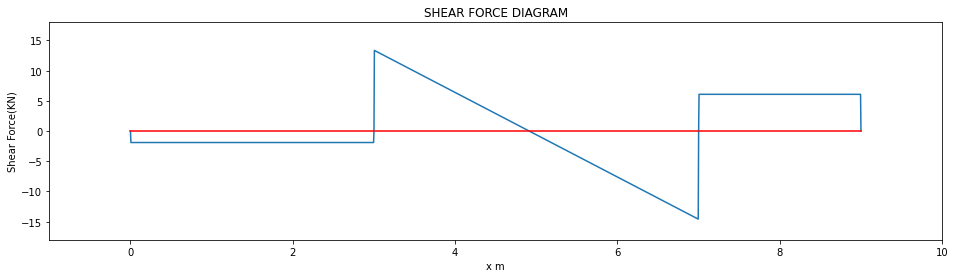

In [7]:
##SHEAR FORCE DIAGRAM
xx=[]
SF=[]
for i in range(1801):
    if i==0:
        V=0
    if i>0 and i/200<3:
        V=forceresult[0]/1000
    if i/200==3:
        V=0
    if i/200>3 and i/200<7:
        V=(forceresult[0]+forceresult[2])/1000-7*(i/200-3)
    if i/200==7:
        V=0    
    if i/200>7 and i/200<9:
        V= -forceresult[6] /1000
    if i/200==9:
        V=0
    xx.append(i/200)    
    SF.append(V) 
  
    
from matplotlib import pyplot as plt
plt.figure(figsize=(16,4))
plt.plot(xx,SF)
plt.plot([0]*10, color='r')
plt.title('SHEAR FORCE DIAGRAM')
plt.xlabel('x m')
plt.ylabel('Shear Force(KN)')
plt.ylim(-18,18)
plt.xlim(-1,10)

(-1.0, 10.0)

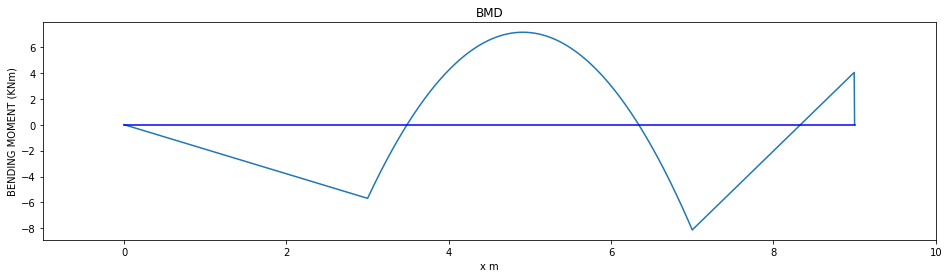

In [10]:
## BMD
xx=[]
BM=[]
for i in range(1801):
    if i==0:
        M=0
    if i>0 and i/200<=3:
        M=forceresult[0]*0.001*i/200
    if i/200>3 and i/200<=7:
        M=(forceresult[0]*i/200+forceresult[2]*(i/200-3))/1000-7*(((i/200-3)**2)/2) 
    if i/200>7 and i/200<9:
        M= forceresult[6]*(9-i/200)/1000+forceresult[7]/1000000
    if i/200==9:
        M=0
    xx.append(i/200)    
    BM.append(M) 
  
    
from matplotlib import pyplot as plt
plt.figure(figsize=(16,4))
plt.plot(xx,BM)
plt.plot([0]*10, color='b')
plt.title('BMD')
plt.xlabel('x m')
plt.ylabel('BENDING MOMENT (KNm)')
#plt.ylim(-18,18)
plt.xlim(-1,10)